# 相关库导入

In [7]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import matplotlib as mpl

# 创建有向图

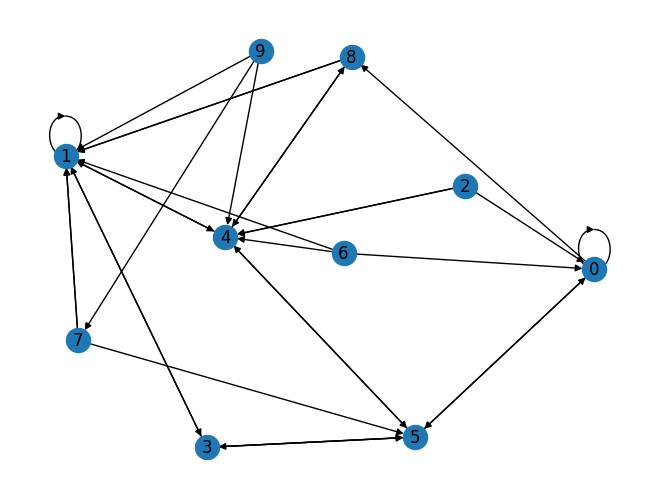

In [3]:
seed = 13648
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos, with_labels=True)


# 高级可视化设置

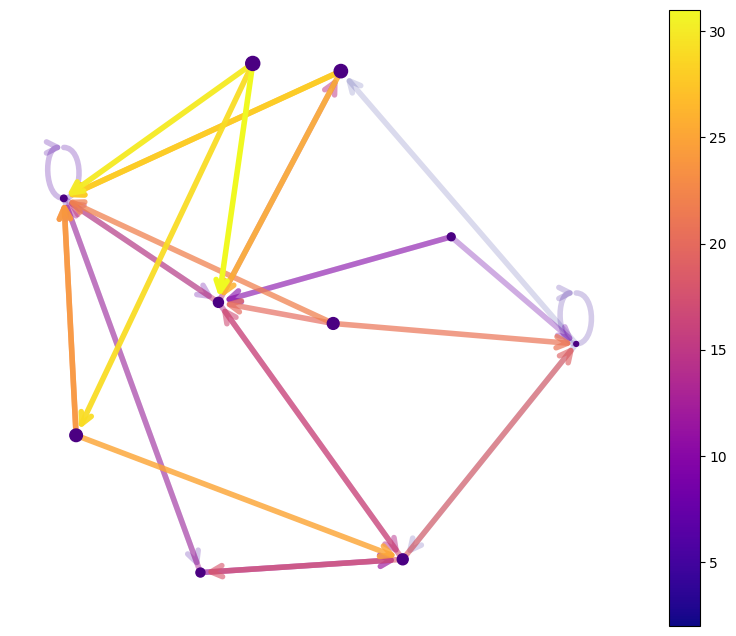

In [6]:
# 节点大小
node_sizes = [12 + 10 * i for i in range(len(G))]

# 节点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)

# 节点透明度
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

# 配色方案
cmap = plt.cm.plasma
# cmap = plt.cm.Blues

plt.figure(figsize=(10,8))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")

# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,   # 节点尺寸
    arrowstyle="->",        # 箭头样式
    arrowsize=20,           # 箭头尺寸
    edge_color=edge_colors, # 连接颜色
    edge_cmap=cmap,         # 连接配色方案
    width=4                # 连接线宽
)


# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# 调色图例
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc,ax=plt.gca())

ax = plt.gca()
ax.set_axis_off()
plt.show()
